In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
path = 'Renewable Energy Data/Andhra Pradesh'
all_files = glob.glob(path + "/*.csv")

#filename = '/home/data/BITS/BITS 3-1/Applied Stastical Methods/Assignment-2/Statistical-Analysis-and-Forecasting-of-Solar-Energy/Renewable Energy Data/Andhra Pradesh/34082_14.25_77.35_2000.csv'

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [4]:
frame.head()

,Year,Month,Day,Hour,Minute,GHI,Date
0,2001,1,1,0,0,0,2001-01-01 00:00:00
1,2001,1,1,1,0,0,2001-01-01 01:00:00
2,2001,1,1,2,0,0,2001-01-01 02:00:00
3,2001,1,1,3,0,0,2001-01-01 03:00:00
4,2001,1,1,4,0,0,2001-01-01 04:00:00


In [5]:
import datetime as dt

df_all = frame[['Date','GHI']]
single = df_all['Date']

In [6]:
df_all.set_index('Date',inplace=True)

In [7]:
df_all = df_all.between_time('09:00','15:00')

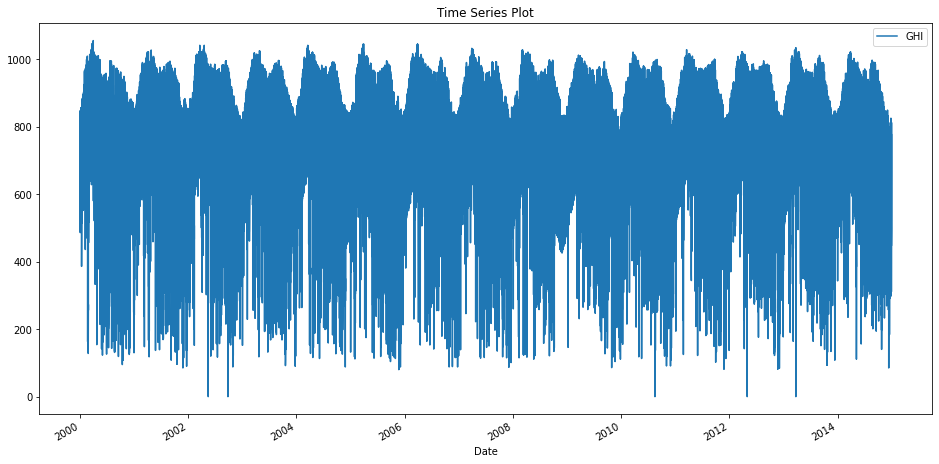

In [8]:
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [9]:
df_all.fillna(df_all.mean(),inplace=True)

In [10]:
y=df_all['GHI'].resample('W-MON').mean()

In [11]:
y.head()

Date
2000-01-03    673.761905
2000-01-10    702.244898
2000-01-17    697.673469
2000-01-24    740.020408
2000-01-31    753.285714
Freq: W-MON, Name: GHI, dtype: float64

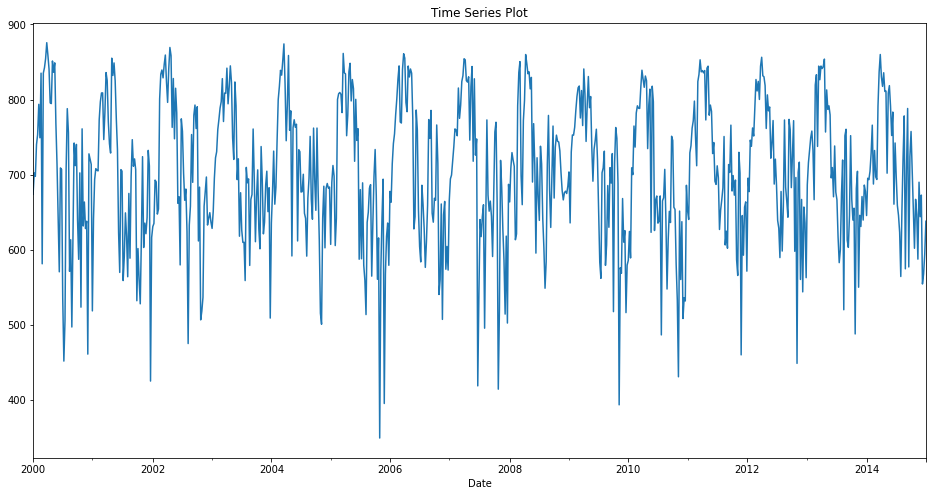

In [12]:
y.plot(figsize=[16,8],title='Time Series Plot')

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
result=seasonal_decompose(y,model='additive')

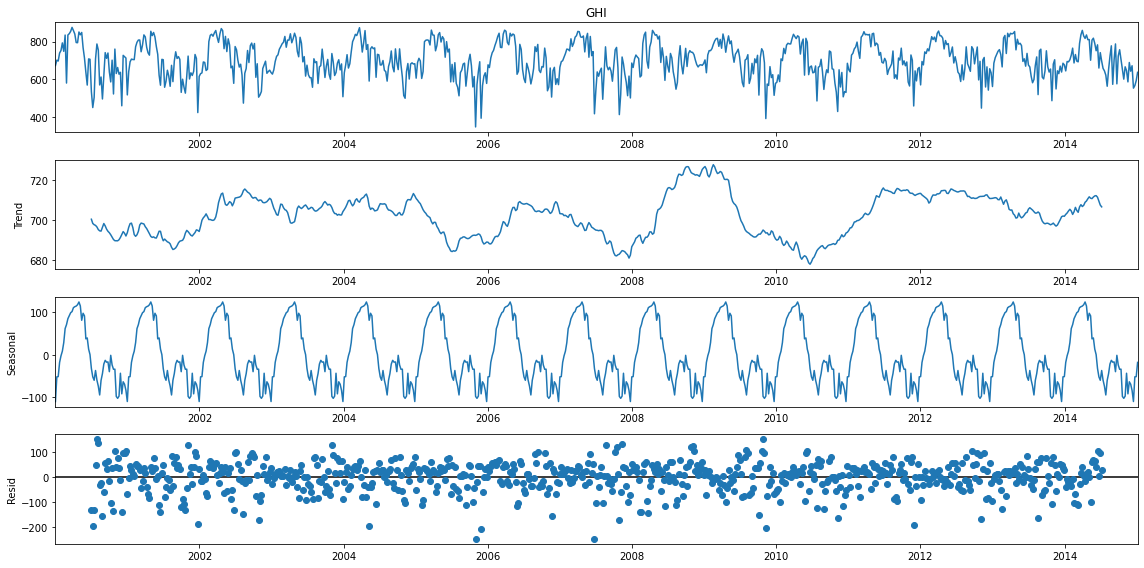

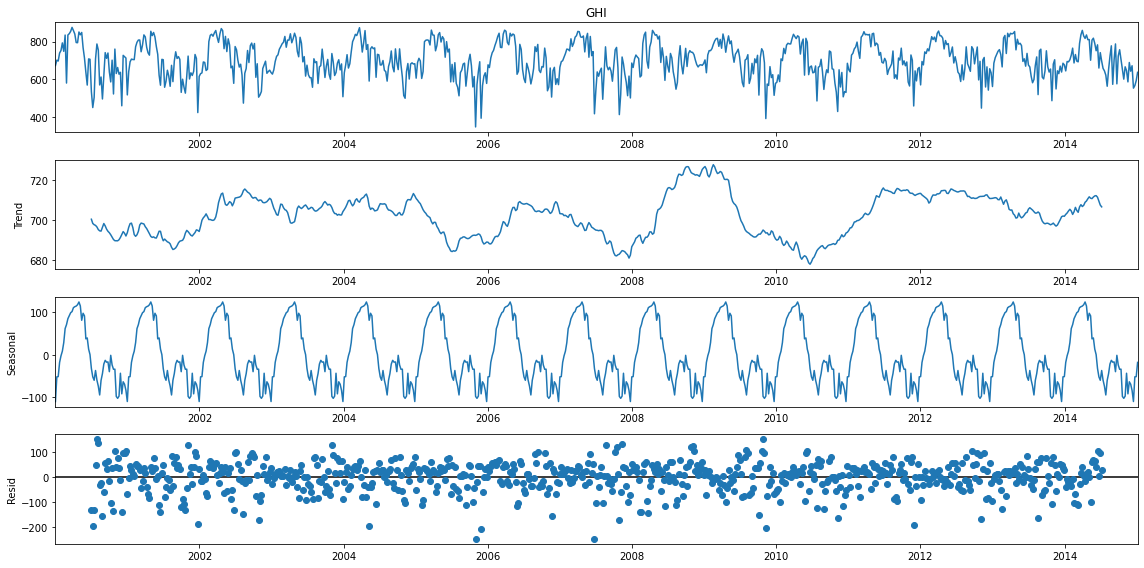

In [15]:
import pylab
pylab.rcParams['figure.figsize'] = (16, 8)
result.plot()

In [16]:
import statsmodels.tsa.api as smtsa

In [17]:
X = df_all.GHI
X.head()

Date
2001-01-01 09:00:00    509
2001-01-01 10:00:00    557
2001-01-01 11:00:00    619
2001-01-01 12:00:00    342
2001-01-01 13:00:00    500
Name: GHI, dtype: int64

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.502245
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [20]:
from statsmodels.graphics.tsaplots import plot_acf

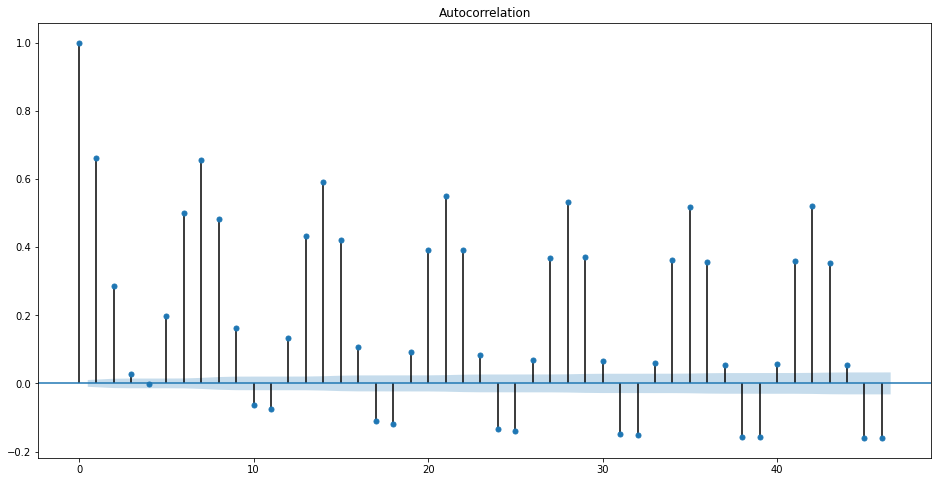

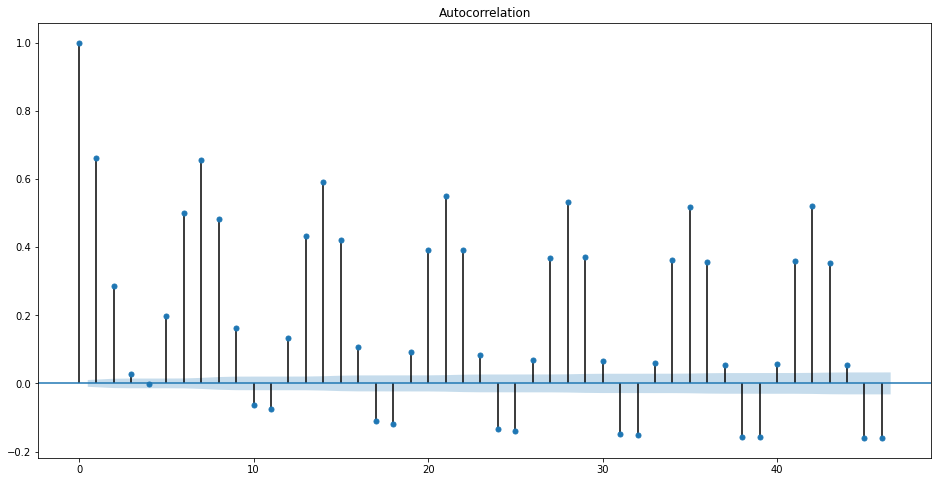

In [21]:
plot_acf(X)

In [22]:
X_diff = X.diff(periods=1)

In [23]:
X_diff.head()

Date
2001-01-01 09:00:00      NaN
2001-01-01 10:00:00     48.0
2001-01-01 11:00:00     62.0
2001-01-01 12:00:00   -277.0
2001-01-01 13:00:00    158.0
Name: GHI, dtype: float64

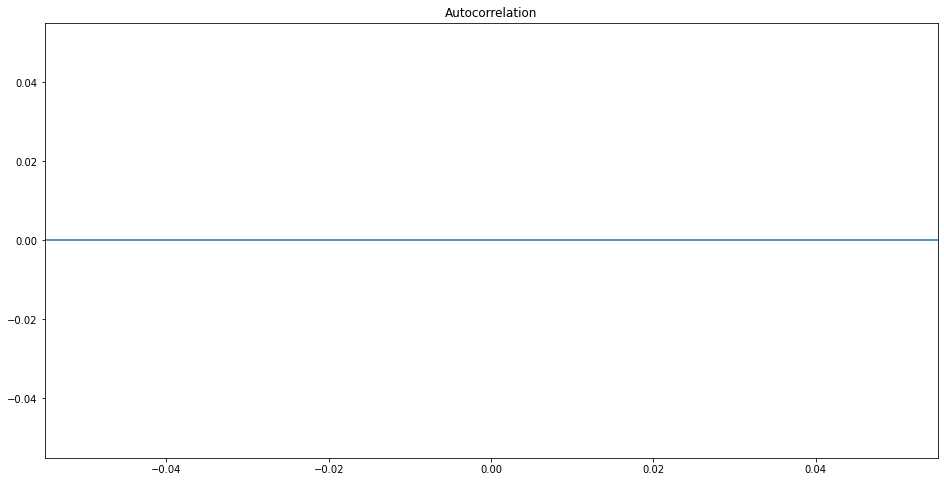

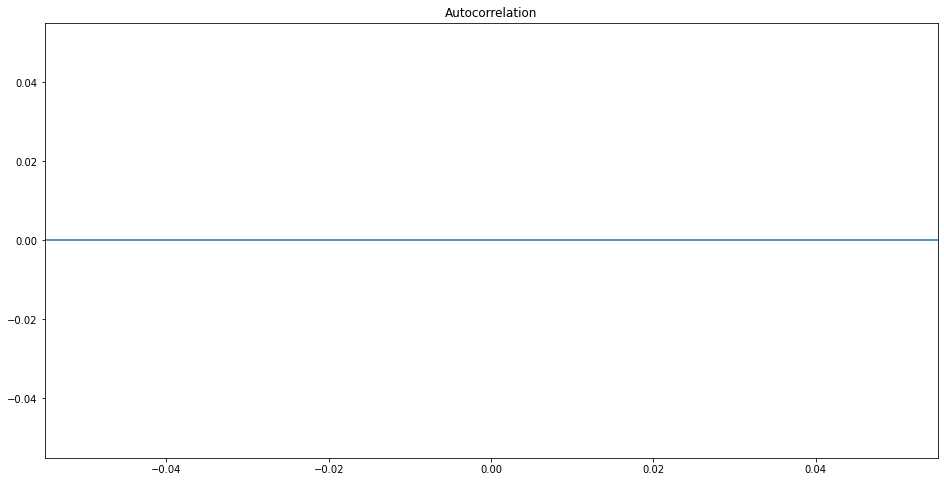

In [24]:
plot_acf(X_diff)

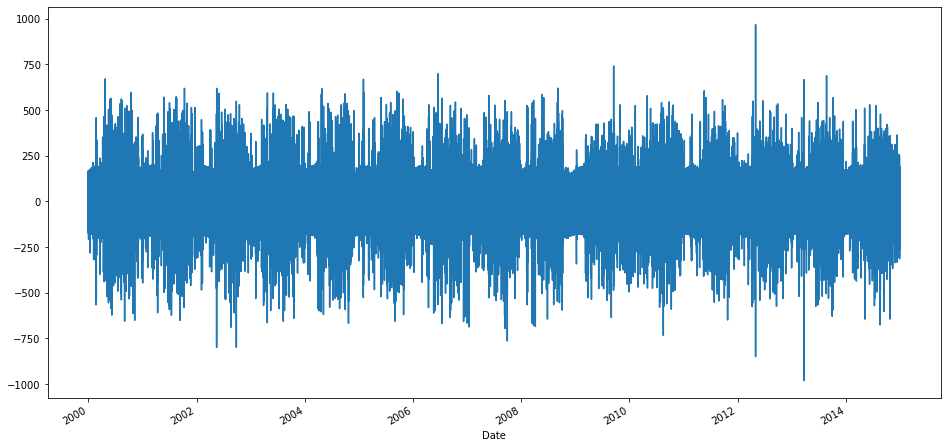

In [25]:
X_diff.plot()

In [26]:
import statsmodels.api as sm

In [59]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [60]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)52 - AIC:12502.648437281034
ARIMA(0, 0, 0)x(0, 0, 1, 12)52 - AIC:11504.384788112378
ARIMA(0, 0, 0)x(0, 0, 2, 12)52 - AIC:10728.231844565023
ARIMA(0, 0, 0)x(0, 1, 0, 12)52 - AIC:9769.88955834581
ARIMA(0, 0, 0)x(0, 1, 1, 12)52 - AIC:9106.654639014918
ARIMA(0, 0, 0)x(0, 1, 2, 12)52 - AIC:8951.50165849302
ARIMA(0, 0, 0)x(0, 2, 0, 12)52 - AIC:10396.730407033738
ARIMA(0, 0, 0)x(0, 2, 1, 12)52 - AIC:9505.866348138094
ARIMA(0, 0, 0)x(0, 2, 2, 12)52 - AIC:8902.00939357896
ARIMA(0, 0, 0)x(1, 0, 0, 12)52 - AIC:9776.229764454823
ARIMA(0, 0, 0)x(1, 0, 1, 12)52 - AIC:9362.501358350217
ARIMA(0, 0, 0)x(1, 0, 2, 12)52 - AIC:9115.739452164169
ARIMA(0, 0, 0)x(1, 1, 0, 12)52 - AIC:9502.839164637284
ARIMA(0, 0, 0)x(1, 1, 1, 12)52 - AIC:9105.274095448887
ARIMA(0, 0, 0)x(1, 1, 2, 12)52 - AIC:8949.34278296048
ARIMA(0, 0, 0)x(1, 2, 0, 12)52 - AIC:9903.072103136243
ARIMA(0, 0, 0)x(1, 2, 1, 12)52 - AIC:9392.867474344192


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 2, 2, 12)52 - AIC:8902.211173677024
ARIMA(0, 0, 0)x(2, 0, 0, 12)52 - AIC:9499.019991093845
ARIMA(0, 0, 0)x(2, 0, 1, 12)52 - AIC:9208.689893595474
ARIMA(0, 0, 0)x(2, 0, 2, 12)52 - AIC:9163.147218120816
ARIMA(0, 0, 0)x(2, 1, 0, 12)52 - AIC:9265.843984956991
ARIMA(0, 0, 0)x(2, 1, 1, 12)52 - AIC:8912.665890310866
ARIMA(0, 0, 0)x(2, 1, 2, 12)52 - AIC:8883.413092945688
ARIMA(0, 0, 0)x(2, 2, 0, 12)52 - AIC:9679.437542244079
ARIMA(0, 0, 0)x(2, 2, 1, 12)52 - AIC:9176.628227379639
ARIMA(0, 0, 0)x(2, 2, 2, 12)52 - AIC:8855.790689622077
ARIMA(0, 0, 1)x(0, 0, 0, 12)52 - AIC:11564.416607649002
ARIMA(0, 0, 1)x(0, 0, 1, 12)52 - AIC:10790.77852034917
ARIMA(0, 0, 1)x(0, 0, 2, 12)52 - AIC:10222.753470473963
ARIMA(0, 0, 1)x(0, 1, 0, 12)52 - AIC:9495.442955131672
ARIMA(0, 0, 1)x(0, 1, 1, 12)52 - AIC:8854.00641880853
ARIMA(0, 0, 1)x(0, 1, 2, 12)52 - AIC:8705.568137789287
ARIMA(0, 0, 1)x(0, 2, 0, 12)52 - AIC:10146.395094582556
ARIMA(0, 0, 1)x(0, 2, 1, 12)52 - AIC:9243.310632561128
ARIMA(0,

/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)52 - AIC:9005.648376070687
ARIMA(0, 0, 1)x(1, 0, 2, 12)52 - AIC:8860.757938812618
ARIMA(0, 0, 1)x(1, 1, 0, 12)52 - AIC:9210.383188940505
ARIMA(0, 0, 1)x(1, 1, 1, 12)52 - AIC:8853.600767270249


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 2, 12)52 - AIC:8705.419174206072
ARIMA(0, 0, 1)x(1, 2, 0, 12)52 - AIC:9631.160500220618
ARIMA(0, 0, 1)x(1, 2, 1, 12)52 - AIC:9096.55305244655


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 2, 2, 12)52 - AIC:8659.88688133239
ARIMA(0, 0, 1)x(2, 0, 0, 12)52 - AIC:9205.4056262525
ARIMA(0, 0, 1)x(2, 0, 1, 12)52 - AIC:8885.232281551616


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 0, 2, 12)52 - AIC:9333.673874701319
ARIMA(0, 0, 1)x(2, 1, 0, 12)52 - AIC:8986.438942293447
ARIMA(0, 0, 1)x(2, 1, 1, 12)52 - AIC:8713.374553670357
ARIMA(0, 0, 1)x(2, 1, 2, 12)52 - AIC:8689.15626093029
ARIMA(0, 0, 1)x(2, 2, 0, 12)52 - AIC:9370.932731124209
ARIMA(0, 0, 1)x(2, 2, 1, 12)52 - AIC:8901.4601503542
ARIMA(0, 0, 1)x(2, 2, 2, 12)52 - AIC:8645.54128660581
ARIMA(0, 0, 2)x(0, 0, 0, 12)52 - AIC:10914.3813862759
ARIMA(0, 0, 2)x(0, 0, 1, 12)52 - AIC:10298.501679676574
ARIMA(0, 0, 2)x(0, 0, 2, 12)52 - AIC:10066.71814776509
ARIMA(0, 0, 2)x(0, 1, 0, 12)52 - AIC:9386.55122336045
ARIMA(0, 0, 2)x(0, 1, 1, 12)52 - AIC:8755.427314316425
ARIMA(0, 0, 2)x(0, 1, 2, 12)52 - AIC:8613.743658635936
ARIMA(0, 0, 2)x(0, 2, 0, 12)52 - AIC:10042.674201113641
ARIMA(0, 0, 2)x(0, 2, 1, 12)52 - AIC:9136.772602366505
ARIMA(0, 0, 2)x(0, 2, 2, 12)52 - AIC:8563.741306217722
ARIMA(0, 0, 2)x(1, 0, 0, 12)52 - AIC:9473.990154237366


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 0, 1, 12)52 - AIC:9490.357234364548


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 0, 2, 12)52 - AIC:8820.416624320153
ARIMA(0, 0, 2)x(1, 1, 0, 12)52 - AIC:9103.74187726633
ARIMA(0, 0, 2)x(1, 1, 1, 12)52 - AIC:8756.624652677965
ARIMA(0, 0, 2)x(1, 1, 2, 12)52 - AIC:8613.104769529873
ARIMA(0, 0, 2)x(1, 2, 0, 12)52 - AIC:9537.817244789141
ARIMA(0, 0, 2)x(1, 2, 1, 12)52 - AIC:8978.627832430238


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 2, 2, 12)52 - AIC:8565.590897252489
ARIMA(0, 0, 2)x(2, 0, 0, 12)52 - AIC:9097.235669954993


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12)52 - AIC:8800.880270741958


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 2, 12)52 - AIC:8774.086039609101
ARIMA(0, 0, 2)x(2, 1, 0, 12)52 - AIC:8875.984759215678
ARIMA(0, 0, 2)x(2, 1, 1, 12)52 - AIC:8641.5933069686
ARIMA(0, 0, 2)x(2, 1, 2, 12)52 - AIC:8607.279107209062
ARIMA(0, 0, 2)x(2, 2, 0, 12)52 - AIC:9245.395166821203
ARIMA(0, 0, 2)x(2, 2, 1, 12)52 - AIC:8792.27960999327


/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 2, 2, 12)52 - AIC:8555.917834032267
ARIMA(0, 1, 0)x(0, 0, 0, 12)52 - AIC:9102.183227441717
ARIMA(0, 1, 0)x(0, 0, 1, 12)52 - AIC:8954.096310788831


KeyboardInterrupt: 

In [27]:
mod = sm.tsa.statespace.SARIMAX(y['2000':'2012'],
                                order=(0, 0, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5431      0.039     13.833      0.000       0.466       0.620
ma.L2          0.3269      0.036      9.089      0.000       0.256       0.397
ar.S.L12      -0.0437      0.038     -1.155      0.248      -0.118       0.030
ma.S.L12      -1.0265      0.033    -30.891      0.000      -1.092      -0.961
sigma2      5627.9679    337.794     16.661      0.000    4965.903    6290.032


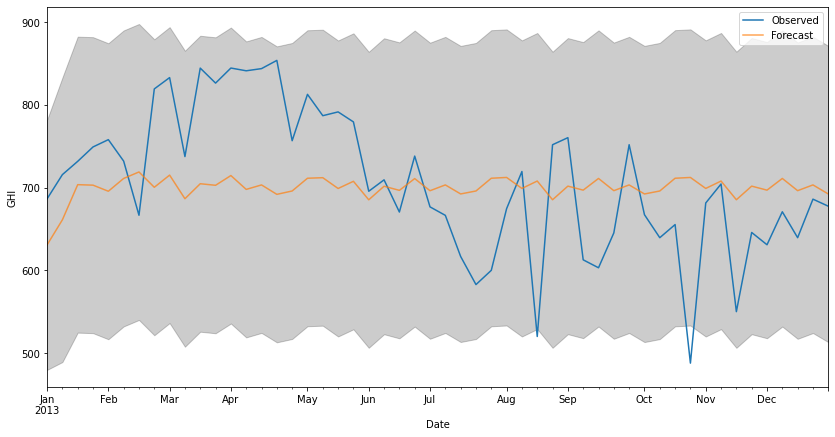

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-03'),end=pd.to_datetime('2013-12-26'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2013':'2013'].plot(label='Observed')

pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('GHI')
plt.legend()
plt.show()